# 베이스라인 모델 발전시키기

In [14]:
#데이터를 불러옵니다.
import pandas as pd
import warnings
warnings.filterwarnings('ignore') # warning message 안나오도록함.

#케라스를 통해 모델 생성을 시작합니다.
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm



In [15]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [16]:
#독립변수와 종속변수를 분리합니다.
train_X = train.iloc[:,4:]
train_Y = train.iloc[:,0:4]
test_X = test.iloc[:,1:]

In [17]:
scaler = StandardScaler()

# fit은 train에만 
train_x = scaler.fit_transform(train_X)
test_x = scaler.transform(test_X)

train_y = scaler.fit_transform(train_Y)

### epoch 수 증가

In [7]:
model = Sequential()  # model 초기화 
model.add(Dense(units=452, activation='relu', input_dim=226))  # 첫번째 은닉층  # 226개 feature, 160개 뉴런, relu 함수를 활성화 함수로 사용
model.add(Dropout(0.1))
model.add(Dense(units=339, activation='relu'))   # 두번째 은닉층  
model.add(Dropout(0.1))
model.add(Dense(units=226, activation='relu'))   # 세번째 은닉층  
model.add(Dropout(0.1))
model.add(Dense(units=113, activation='relu'))   # 네번째 은닉층
model.add(Dropout(0.1))
model.add(Dense(units=4, activation='linear'))   # 출력층 (4개의 output을 도출해내야되기 때문에 units = 4)

model.compile(loss='mae', optimizer='adam', metrics=['mae'])

history = model.fit(train_x, train_y, epochs=1000, batch_size=1000, validation_split = 0.05)  


Train on 769500 samples, validate on 40500 samples
Epoch 1/1000
769500/769500 [==============================] - 46s 59us/step - loss: 0.4800 - mae: 0.4800 - val_loss: 0.4887 - val_mae: 0.4887
Epoch 2/1000
769500/769500 [==============================] - 47s 60us/step - loss: 0.3179 - mae: 0.3179 - val_loss: 0.3998 - val_mae: 0.3998
Epoch 3/1000
769500/769500 [==============================] - 47s 61us/step - loss: 0.2629 - mae: 0.2629 - val_loss: 0.3591 - val_mae: 0.3591
Epoch 4/1000
769500/769500 [==============================] - 47s 60us/step - loss: 0.2339 - mae: 0.2339 - val_loss: 0.3256 - val_mae: 0.3256
Epoch 5/1000
769500/769500 [==============================] - 51s 66us/step - loss: 0.2164 - mae: 0.2164 - val_loss: 0.3009 - val_mae: 0.30092165 - ma
Epoch 6/1000
769500/769500 [==============================] - 50s 65us/step - loss: 0.2048 - mae: 0.2048 - val_loss: 0.2869 - val_mae: 0.2869
Epoch 7/1000
769500/769500 [==============================] - 50s 65us/step - loss: 0.1

769500/769500 [==============================] - 35s 46us/step - loss: 0.1296 - mae: 0.1296 - val_loss: 0.1953 - val_mae: 0.1953
Epoch 114/1000
769500/769500 [==============================] - 35s 45us/step - loss: 0.1298 - mae: 0.1298 - val_loss: 0.1932 - val_mae: 0.1932
Epoch 115/1000
769500/769500 [==============================] - 35s 46us/step - loss: 0.1296 - mae: 0.1296 - val_loss: 0.2041 - val_mae: 0.2041
Epoch 116/1000
769500/769500 [==============================] - 35s 46us/step - loss: 0.1296 - mae: 0.1296 - val_loss: 0.2045 - val_mae: 0.2045
Epoch 117/1000
769500/769500 [==============================] - 36s 47us/step - loss: 0.1295 - mae: 0.1295 - val_loss: 0.1953 - val_mae: 0.1953
Epoch 118/1000
769500/769500 [==============================] - 37s 48us/step - loss: 0.1295 - mae: 0.1295 - val_loss: 0.1975 - val_mae: 0.1975
Epoch 119/1000
769500/769500 [==============================] - 35s 45us/step - loss: 0.1293 - mae: 0.1293 - val_loss: 0.1969 - val_mae: 0.1969
Epoch 1

Epoch 170/1000
769500/769500 [==============================] - 34s 44us/step - loss: 0.1256 - mae: 0.1256 - val_loss: 0.1902 - val_mae: 0.1902
Epoch 171/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1258 - mae: 0.1258 - val_loss: 0.1985 - val_mae: 0.1985
Epoch 172/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1256 - mae: 0.1256 - val_loss: 0.1987 - val_mae: 0.1987
Epoch 173/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1258 - mae: 0.1258 - val_loss: 0.1993 - val_mae: 0.1993
Epoch 174/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1255 - mae: 0.1255 - val_loss: 0.1907 - val_mae: 0.1907
Epoch 175/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1256 - mae: 0.1256 - val_loss: 0.1999 - val_mae: 0.1999
Epoch 176/1000
769500/769500 [==============================] - 34s 44us/step - loss: 0.1255 - mae: 0.1255 - val_loss: 0.2002 - val_mae:

769500/769500 [==============================] - 33s 43us/step - loss: 0.1215 - mae: 0.1215 - val_loss: 0.2022 - val_mae: 0.2022
Epoch 283/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1214 - mae: 0.1214 - val_loss: 0.1898 - val_mae: 0.1898
Epoch 284/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1217 - mae: 0.1217 - val_loss: 0.1842 - val_mae: 0.1842
Epoch 285/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1214 - mae: 0.1214 - val_loss: 0.1960 - val_mae: 0.1960
Epoch 286/1000
769500/769500 [==============================] - 33s 42us/step - loss: 0.1214 - mae: 0.1214 - val_loss: 0.1887 - val_mae: 0.1887
Epoch 287/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1212 - mae: 0.1212 - val_loss: 0.1857 - val_mae: 0.1857
Epoch 288/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1214 - mae: 0.1214 - val_loss: 0.1882 - val_mae: 0.1882
Epoch 2

Epoch 339/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1202 - mae: 0.1202 - val_loss: 0.1930 - val_mae: 0.1930
Epoch 340/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1204 - mae: 0.1204 - val_loss: 0.1833 - val_mae: 0.1833
Epoch 341/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1203 - mae: 0.1203 - val_loss: 0.1800 - val_mae: 0.1800
Epoch 342/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1203 - mae: 0.1203 - val_loss: 0.1832 - val_mae: 0.1832
Epoch 343/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1202 - mae: 0.1202 - val_loss: 0.1850 - val_mae: 0.1850
Epoch 344/1000
769500/769500 [==============================] - 33s 42us/step - loss: 0.1200 - mae: 0.1200 - val_loss: 0.1870 - val_mae: 0.1870
Epoch 345/1000
769500/769500 [==============================] - 34s 44us/step - loss: 0.1200 - mae: 0.1200 - val_loss: 0.1775 - val_mae:

Epoch 452/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1183 - mae: 0.1183 - val_loss: 0.1841 - val_mae: 0.1841
Epoch 453/1000
769500/769500 [==============================] - 33s 42us/step - loss: 0.1181 - mae: 0.1181 - val_loss: 0.1799 - val_mae: 0.1799
Epoch 454/1000
769500/769500 [==============================] - 33s 42us/step - loss: 0.1180 - mae: 0.1180 - val_loss: 0.1824 - val_mae: 0.1824
Epoch 455/1000
769500/769500 [==============================] - 32s 42us/step - loss: 0.1184 - mae: 0.1184 - val_loss: 0.1693 - val_mae: 0.1693
Epoch 456/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1183 - mae: 0.1183 - val_loss: 0.1688 - val_mae: 0.1688
Epoch 457/1000
769500/769500 [==============================] - 34s 44us/step - loss: 0.1181 - mae: 0.1181 - val_loss: 0.1764 - val_mae: 0.1764
Epoch 458/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1185 - mae: 0.1185 - val_loss: 0.1764 - val_mae:

Epoch 565/1000
769500/769500 [==============================] - 33s 42us/step - loss: 0.1170 - mae: 0.1170 - val_loss: 0.1694 - val_mae: 0.1694
Epoch 566/1000
769500/769500 [==============================] - 33s 42us/step - loss: 0.1170 - mae: 0.1170 - val_loss: 0.1775 - val_mae: 0.1775
Epoch 567/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1169 - mae: 0.1169 - val_loss: 0.1687 - val_mae: 0.1687
Epoch 568/1000
769500/769500 [==============================] - 33s 42us/step - loss: 0.1171 - mae: 0.1171 - val_loss: 0.1679 - val_mae: 0.1679
Epoch 569/1000
769500/769500 [==============================] - 34s 44us/step - loss: 0.1169 - mae: 0.1169 - val_loss: 0.1787 - val_mae: 0.1787
Epoch 570/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1168 - mae: 0.1168 - val_loss: 0.1662 - val_mae: 0.1662
Epoch 571/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1170 - mae: 0.1170 - val_loss: 0.1831 - val_mae:

Epoch 622/1000
769500/769500 [==============================] - 34s 44us/step - loss: 0.1166 - mae: 0.1166 - val_loss: 0.1801 - val_mae: 0.1801
Epoch 623/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1165 - mae: 0.1165 - val_loss: 0.1716 - val_mae: 0.1716
Epoch 624/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1165 - mae: 0.1165 - val_loss: 0.2014 - val_mae: 0.2014
Epoch 625/1000
769500/769500 [==============================] - 33s 42us/step - loss: 0.1165 - mae: 0.1165 - val_loss: 0.1786 - val_mae: 0.1786
Epoch 626/1000
769500/769500 [==============================] - 34s 44us/step - loss: 0.1163 - mae: 0.1163 - val_loss: 0.1742 - val_mae: 0.1742
Epoch 627/1000
769500/769500 [==============================] - 33s 42us/step - loss: 0.1164 - mae: 0.1164 - val_loss: 0.1761 - val_mae: 0.1761
Epoch 628/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1164 - mae: 0.1164 - val_loss: 0.1776 - val_mae:

Epoch 735/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1156 - mae: 0.1156 - val_loss: 0.1754 - val_mae: 0.1754
Epoch 736/1000
769500/769500 [==============================] - 33s 42us/step - loss: 0.1152 - mae: 0.1152 - val_loss: 0.1799 - val_mae: 0.1799
Epoch 737/1000
769500/769500 [==============================] - 34s 44us/step - loss: 0.1154 - mae: 0.1154 - val_loss: 0.1682 - val_mae: 0.1682
Epoch 738/1000
769500/769500 [==============================] - 34s 44us/step - loss: 0.1156 - mae: 0.1156 - val_loss: 0.1882 - val_mae: 0.1882
Epoch 739/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1154 - mae: 0.1154 - val_loss: 0.1612 - val_mae: 0.1612
Epoch 740/1000
769500/769500 [==============================] - 33s 42us/step - loss: 0.1154 - mae: 0.1154 - val_loss: 0.1797 - val_mae: 0.1797
Epoch 741/1000
769500/769500 [==============================] - 33s 42us/step - loss: 0.1153 - mae: 0.1153 - val_loss: 0.1833 - val_mae:

Epoch 848/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1148 - mae: 0.1148 - val_loss: 0.1785 - val_mae: 0.1785
Epoch 849/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1147 - mae: 0.1147 - val_loss: 0.1704 - val_mae: 0.1704
Epoch 850/1000
769500/769500 [==============================] - 33s 42us/step - loss: 0.1147 - mae: 0.1147 - val_loss: 0.1790 - val_mae: 0.1790
Epoch 851/1000
769500/769500 [==============================] - 34s 44us/step - loss: 0.1147 - mae: 0.1147 - val_loss: 0.1694 - val_mae: 0.1694
Epoch 852/1000
769500/769500 [==============================] - 33s 42us/step - loss: 0.1148 - mae: 0.1148 - val_loss: 0.1684 - val_mae: 0.1684
Epoch 853/1000
769500/769500 [==============================] - 33s 42us/step - loss: 0.1148 - mae: 0.1148 - val_loss: 0.1818 - val_mae: 0.1818
Epoch 854/1000
769500/769500 [==============================] - 33s 42us/step - loss: 0.1147 - mae: 0.1147 - val_loss: 0.1715 - val_mae:

Epoch 905/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1144 - mae: 0.1144 - val_loss: 0.1680 - val_mae: 0.1680
Epoch 906/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1143 - mae: 0.1143 - val_loss: 0.1723 - val_mae: 0.1723
Epoch 907/1000
769500/769500 [==============================] - 34s 44us/step - loss: 0.1143 - mae: 0.1143 - val_loss: 0.1660 - val_mae: 0.1660
Epoch 908/1000
769500/769500 [==============================] - 33s 42us/step - loss: 0.1143 - mae: 0.1143 - val_loss: 0.1800 - val_mae: 0.1800
Epoch 909/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1144 - mae: 0.1144 - val_loss: 0.1755 - val_mae: 0.1755
Epoch 910/1000
769500/769500 [==============================] - 33s 43us/step - loss: 0.1146 - mae: 0.1146 - val_loss: 0.1729 - val_mae: 0.1729
Epoch 911/1000
769500/769500 [==============================] - 33s 42us/step - loss: 0.1145 - mae: 0.1145 - val_loss: 0.1720 - val_mae:

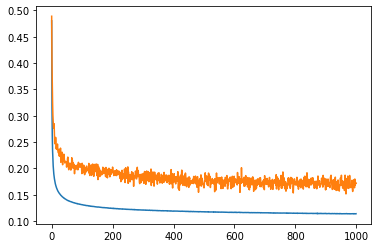

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [9]:
pred_test = model.predict(test_x)

In [10]:
pred_test = scaler.inverse_transform(pred_test)

In [11]:
#submission 파일을 생성합니다.
sample_sub = pd.read_csv('data/sample_submission.csv', index_col=0)
submission = sample_sub+pred_test
submission.to_csv('submission2_scaler_hidden_layer_add_1000_dropout0.1.csv')   # 4.69로 dropout 0.2이었을 때보다 4

### dropout 적용없이 epoch 수만 1000으로 늘림

In [ ]:
model = Sequential()  # model 초기화 
model.add(Dense(units=452, activation='relu', input_dim=226))  # 첫번째 은닉층  # 226개 feature, 160개 뉴런, relu 함수를 활성화 함수로 사용
model.add(Dense(units=339, activation='relu'))   # 두번째 은닉층  
model.add(Dense(units=226, activation='relu'))   # 세번째 은닉층  
model.add(Dense(units=113, activation='relu'))   # 네번째 은닉층
model.add(Dense(units=4, activation='linear'))   # 출력층 (4개의 output을 도출해내야되기 때문에 units = 4)

model.compile(loss='mae', optimizer='adam', metrics=['mae'])

history = model.fit(train_x, train_y, epochs=1000, batch_size=1000, validation_split = 0.05)  

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
pred_test = model.predict(test_x)

In [ ]:
pred_test = scaler.inverse_transform(pred_test)

In [ ]:
#submission 파일을 생성합니다.
sample_sub = pd.read_csv('data/sample_submission.csv', index_col=0)
submission = sample_sub+pred_test
submission.to_csv('submission2_scaler_hidden_layer_add_1000.csv')   # 2.63으로 epoch가 500이었을 때보다 0.04 줄어듦. 

### PCA
- [지난 스터디 중 임현수님 PCA 참고](https://dacon.io/competitions/official/235554/codeshare/1282?page=1&dtype=recent&ptype=pub)


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.99) 
pca_X = pca.fit_transform(train_x)
pca_test = pca.transform(test_x)

In [21]:
pca_X.shape

(810000, 27)

In [23]:
model = Sequential()  # model 초기화 
model.add(Dense(units=452, activation='relu', input_dim=27))  # 첫번째 은닉층  # 226개 feature, 160개 뉴런, relu 함수를 활성화 함수로 사용
model.add(Dense(units=339, activation='relu'))   # 두번째 은닉층  
model.add(Dense(units=226, activation='relu'))   # 세번째 은닉층  
model.add(Dense(units=113, activation='relu'))   # 네번째 은닉층
model.add(Dense(units=4, activation='linear'))   # 출력층 (4개의 output을 도출해내야되기 때문에 units = 4)

model.compile(loss='mae', optimizer='adam', metrics=['mae'])

history = model.fit(pca_X, train_y, epochs=500, batch_size=1000, validation_split = 0.05)  

Train on 769500 samples, validate on 40500 samples
Epoch 1/500
769500/769500 [==============================] - 18s 24us/step - loss: 0.4162 - mae: 0.4162 - val_loss: 0.4906 - val_mae: 0.4906
Epoch 2/500
769500/769500 [==============================] - 21s 27us/step - loss: 0.2511 - mae: 0.2511 - val_loss: 0.3904 - val_mae: 0.3904
Epoch 3/500
769500/769500 [==============================] - 20s 26us/step - loss: 0.1954 - mae: 0.1954 - val_loss: 0.3767 - val_mae: 0.3767
Epoch 4/500
769500/769500 [==============================] - 19s 25us/step - loss: 0.1638 - mae: 0.1638 - val_loss: 0.3299 - val_mae: 0.3299
Epoch 5/500
769500/769500 [==============================] - 21s 28us/step - loss: 0.1433 - mae: 0.1433 - val_loss: 0.3305 - val_mae: 0.3305
Epoch 6/500
769500/769500 [==============================] - 20s 26us/step - loss: 0.1283 - mae: 0.1283 - val_loss: 0.3148 - val_mae: 0.3148
Epoch 7/500
769500/769500 [==============================] - 19s 25us/step - loss: 0.1167 - mae: 0.1167

769500/769500 [==============================] - 21s 28us/step - loss: 0.0333 - mae: 0.0333 - val_loss: 0.1905 - val_mae: 0.1905
Epoch 116/500
769500/769500 [==============================] - 18s 24us/step - loss: 0.0336 - mae: 0.0336 - val_loss: 0.1807 - val_mae: 0.1807
Epoch 117/500
769500/769500 [==============================] - 17s 22us/step - loss: 0.0332 - mae: 0.0332 - val_loss: 0.1746 - val_mae: 0.1746
Epoch 118/500
769500/769500 [==============================] - 19s 25us/step - loss: 0.0334 - mae: 0.0334 - val_loss: 0.1877 - val_mae: 0.1877
Epoch 119/500
769500/769500 [==============================] - 19s 25us/step - loss: 0.0331 - mae: 0.0331 - val_loss: 0.1850 - val_mae: 0.1850
Epoch 120/500
769500/769500 [==============================] - 21s 27us/step - loss: 0.0329 - mae: 0.0329 - val_loss: 0.1803 - val_mae: 0.1803
Epoch 121/500
769500/769500 [==============================] - 20s 26us/step - loss: 0.0335 - mae: 0.0335 - val_loss: 0.1779 - val_mae: 0.1779
Epoch 122/500

769500/769500 [==============================] - 19s 24us/step - loss: 0.0283 - mae: 0.0283 - val_loss: 0.1889 - val_mae: 0.1889
Epoch 230/500
769500/769500 [==============================] - 19s 24us/step - loss: 0.0282 - mae: 0.0282 - val_loss: 0.1806 - val_mae: 0.1806
Epoch 231/500
769500/769500 [==============================] - 18s 24us/step - loss: 0.0285 - mae: 0.0285 - val_loss: 0.1746 - val_mae: 0.1746
Epoch 232/500
769500/769500 [==============================] - 18s 24us/step - loss: 0.0289 - mae: 0.0289 - val_loss: 0.1826 - val_mae: 0.1826
Epoch 233/500
769500/769500 [==============================] - 19s 25us/step - loss: 0.0282 - mae: 0.0282 - val_loss: 0.1752 - val_mae: 0.1752
Epoch 234/500
769500/769500 [==============================] - 18s 24us/step - loss: 0.0285 - mae: 0.0285 - val_loss: 0.1880 - val_mae: 0.1880
Epoch 235/500
769500/769500 [==============================] - 18s 23us/step - loss: 0.0283 - mae: 0.0283 - val_loss: 0.1881 - val_mae: 0.1881
Epoch 236/500

769500/769500 [==============================] - 17s 22us/step - loss: 0.0266 - mae: 0.0266 - val_loss: 0.1832 - val_mae: 0.1832
Epoch 344/500
769500/769500 [==============================] - 18s 23us/step - loss: 0.0265 - mae: 0.0265 - val_loss: 0.1727 - val_mae: 0.1727
Epoch 345/500
769500/769500 [==============================] - 17s 22us/step - loss: 0.0264 - mae: 0.0264 - val_loss: 0.1816 - val_mae: 0.1816
Epoch 346/500
769500/769500 [==============================] - 17s 22us/step - loss: 0.0267 - mae: 0.0267 - val_loss: 0.1723 - val_mae: 0.1723
Epoch 347/500
769500/769500 [==============================] - 17s 22us/step - loss: 0.0265 - mae: 0.0265 - val_loss: 0.1749 - val_mae: 0.1749
Epoch 348/500
769500/769500 [==============================] - 17s 22us/step - loss: 0.0267 - mae: 0.0267 - val_loss: 0.1730 - val_mae: 0.1730
Epoch 349/500
769500/769500 [==============================] - 17s 22us/step - loss: 0.0267 - mae: 0.0267 - val_loss: 0.1746 - val_mae: 0.1746
Epoch 350/500

769500/769500 [==============================] - 18s 23us/step - loss: 0.0258 - mae: 0.0258 - val_loss: 0.1776 - val_mae: 0.1776
Epoch 458/500
769500/769500 [==============================] - 17s 22us/step - loss: 0.0260 - mae: 0.0260 - val_loss: 0.1785 - val_mae: 0.1785
Epoch 459/500
769500/769500 [==============================] - 18s 23us/step - loss: 0.0258 - mae: 0.0258 - val_loss: 0.1778 - val_mae: 0.1778
Epoch 460/500
769500/769500 [==============================] - 17s 22us/step - loss: 0.0261 - mae: 0.0261 - val_loss: 0.1746 - val_mae: 0.1746
Epoch 461/500
769500/769500 [==============================] - 18s 23us/step - loss: 0.0252 - mae: 0.0252 - val_loss: 0.1753 - val_mae: 0.1753
Epoch 462/500
769500/769500 [==============================] - 17s 22us/step - loss: 0.0259 - mae: 0.0259 - val_loss: 0.1884 - val_mae: 0.1884
Epoch 463/500
769500/769500 [==============================] - 18s 23us/step - loss: 0.0256 - mae: 0.0256 - val_loss: 0.1792 - val_mae: 0.1792
Epoch 464/500

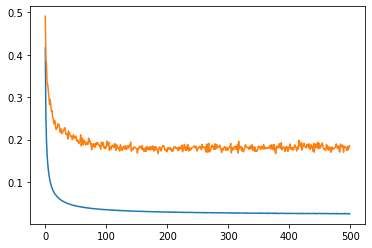

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [26]:
pred_test = model.predict(pca_test)
pred_test = scaler.inverse_transform(pred_test)

In [27]:
#submission 파일을 생성합니다.
sample_sub = pd.read_csv('data/sample_submission.csv', index_col=0)
submission = sample_sub+pred_test
submission.to_csv('submission2_scaler_hidden_layer_add_pca 적용.csv') # 2.671 pca 적용 유무는 별 차이 없음. 

#### pca 장점
- 시간 절약

---

### K-fold

- 정의: k개의 fold를 만들어서 진행하는 교차검증 
- 목적: 성능 평가를 일반화.   
(여러 번 교차검증을 통해 모델들의 성능의 구하거나 최적의 모델을 찾을 수 있음.)
- 과정
    1. train set과 test set을 나눔.
    2. train set을 k개의 fold로 나눔.
    3. 첫번째 fold를 validation set, 나머지 fold로 모델을 훈련시킴. 
    4. validation fold를 바꾸어가며 모든 폴드가 사용될 때까지 반복. 

In [ ]:
skf = KFold(n_splits=5, shuffle=True)  # shuffle = True로 설정하여 분할하기 전 섞기 때문에 데이터가 편중될 확률이 낮아짐.

mae = []

for train, validation in tqdm(skf.split(train_x, train_y)):  # 상태진행바 표시 
    
    model = Sequential()  # model 초기화 
    model.add(Dense(units=904, activation='relu', input_dim=226))      
    model.add(Dense(units=452, activation='relu'))  # 첫번째 은닉층  # 226개 feature, 160개 뉴런, relu 함수를 활성화 함수로 사용
    model.add(Dense(units=339, activation='relu'))   # 두번째 은닉층  
    model.add(Dense(units=226, activation='relu'))   # 세번째 은닉층  
    model.add(Dense(units=113, activation='relu'))   # 네번째 은닉층
    model.add(Dense(units=4, activation='linear'))   # 출력층 (4개의 output을 도출해내야되기 때문에 units = 4)

    # Compile model 
    model.compile(loss='mae', optimizer='adam', metrics=['mae']) 

  # 학습 데이터를 이용해서 학습
    model.fit(train_x[train], train_y[train], epochs=1000, batch_size=1000)

  # 테스트 데이터를 이용해서 검증
    k_mae = '%.4f' % (model.evaluate(train_x[validation], train_y[validation])[1])
    mae.append(k_mae)
    
print('\nK-fold cross validation Mae: {}'.format(mae))

Epoch 1/1000
648000/648000 [==============================] - 44s 67us/step - loss: 0.3687 - mae: 0.3687
Epoch 2/1000
648000/648000 [==============================] - 40s 62us/step - loss: 0.1900 - mae: 0.1900
Epoch 3/1000
648000/648000 [==============================] - 47s 73us/step - loss: 0.1384 - mae: 0.1384
Epoch 4/1000
648000/648000 [==============================] - 41s 64us/step - loss: 0.1123 - mae: 0.1123 1s - lo
Epoch 5/1000
648000/648000 [==============================] - 39s 61us/step - loss: 0.0962 - mae: 0.0962
Epoch 6/1000
648000/648000 [==============================] - 34s 53us/step - loss: 0.0850 - mae: 0.0850
Epoch 7/1000
648000/648000 [==============================] - 34s 53us/step - loss: 0.0771 - mae: 0.0771
Epoch 8/1000
648000/648000 [==============================] - 33s 51us/step - loss: 0.0708 - mae: 0.0708
Epoch 9/1000
648000/648000 [==============================] - 33s 51us/step - loss: 0.0662 - mae: 0.0662
Epoch 10/1000
648000/648000 [==================

648000/648000 [==============================] - 34s 52us/step - loss: 0.0268 - mae: 0.0268
Epoch 76/1000
648000/648000 [==============================] - 33s 50us/step - loss: 0.0266 - mae: 0.0266
Epoch 77/1000
648000/648000 [==============================] - 33s 51us/step - loss: 0.0263 - mae: 0.0263
Epoch 78/1000
648000/648000 [==============================] - 32s 50us/step - loss: 0.0265 - mae: 0.0265
Epoch 79/1000
648000/648000 [==============================] - 33s 51us/step - loss: 0.0257 - mae: 0.0257
Epoch 80/1000
648000/648000 [==============================] - 33s 50us/step - loss: 0.0257 - mae: 0.0257
Epoch 81/1000
648000/648000 [==============================] - 34s 53us/step - loss: 0.0264 - mae: 0.0264
Epoch 82/1000
648000/648000 [==============================] - 34s 53us/step - loss: 0.0259 - mae: 0.0259
Epoch 83/1000
648000/648000 [==============================] - 34s 53us/step - loss: 0.0264 - mae: 0.0264
Epoch 84/1000
648000/648000 [==============================]

648000/648000 [==============================] - 41s 63us/step - loss: 0.0225 - mae: 0.0225
Epoch 152/1000
648000/648000 [==============================] - 38s 59us/step - loss: 0.0218 - mae: 0.0218
Epoch 153/1000
648000/648000 [==============================] - 38s 59us/step - loss: 0.0216 - mae: 0.0216
Epoch 154/1000
648000/648000 [==============================] - 39s 60us/step - loss: 0.0215 - mae: 0.0215
Epoch 155/1000
648000/648000 [==============================] - 37s 58us/step - loss: 0.0226 - mae: 0.0226
Epoch 156/1000
648000/648000 [==============================] - 40s 61us/step - loss: 0.0221 - mae: 0.0221
Epoch 157/1000
648000/648000 [==============================] - 38s 58us/step - loss: 0.0214 - mae: 0.0214
Epoch 158/1000
648000/648000 [==============================] - 37s 57us/step - loss: 0.0223 - mae: 0.0223
Epoch 159/1000
648000/648000 [==============================] - 38s 59us/step - loss: 0.0220 - mae: 0.0220
Epoch 160/1000
648000/648000 [======================

648000/648000 [==============================] - 36s 55us/step - loss: 0.0208 - mae: 0.0208
Epoch 227/1000
648000/648000 [==============================] - 40s 61us/step - loss: 0.0210 - mae: 0.0210 0s - loss: 0.0210 - mae: 0.
Epoch 228/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0194 - mae: 0.0194
Epoch 229/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0193 - mae: 0.0193
Epoch 230/1000
648000/648000 [==============================] - 34s 53us/step - loss: 0.0206 - mae: 0.0206
Epoch 231/1000
648000/648000 [==============================] - 33s 51us/step - loss: 0.0221 - mae: 0.0221
Epoch 232/1000
648000/648000 [==============================] - 34s 52us/step - loss: 0.0194 - mae: 0.0194
Epoch 233/1000
648000/648000 [==============================] - 33s 51us/step - loss: 0.0193 - mae: 0.0193
Epoch 234/1000
648000/648000 [==============================] - 33s 52us/step - loss: 0.0209 - mae: 0.0209
Epoch 235/1000
648000/64

648000/648000 [==============================] - 33s 51us/step - loss: 0.0191 - mae: 0.0191
Epoch 303/1000
648000/648000 [==============================] - 37s 57us/step - loss: 0.0200 - mae: 0.0200
Epoch 304/1000
648000/648000 [==============================] - 33s 51us/step - loss: 0.0195 - mae: 0.0195
Epoch 305/1000
648000/648000 [==============================] - 33s 52us/step - loss: 0.0202 - mae: 0.0202
Epoch 306/1000
648000/648000 [==============================] - 34s 52us/step - loss: 0.0185 - mae: 0.0185
Epoch 307/1000
648000/648000 [==============================] - 33s 51us/step - loss: 0.0189 - mae: 0.0189
Epoch 308/1000
648000/648000 [==============================] - 33s 51us/step - loss: 0.0187 - mae: 0.0187
Epoch 309/1000
648000/648000 [==============================] - 33s 51us/step - loss: 0.0195 - mae: 0.0195
Epoch 310/1000
648000/648000 [==============================] - 34s 52us/step - loss: 0.0208 - mae: 0.0208
Epoch 311/1000
648000/648000 [======================

648000/648000 [==============================] - 36s 55us/step - loss: 0.0182 - mae: 0.0182
Epoch 377/1000
648000/648000 [==============================] - 34s 53us/step - loss: 0.0183 - mae: 0.0183
Epoch 378/1000
648000/648000 [==============================] - 35s 53us/step - loss: 0.0189 - mae: 0.0189
Epoch 379/1000
648000/648000 [==============================] - 35s 55us/step - loss: 0.0189 - mae: 0.0189
Epoch 380/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0196 - mae: 0.0196
Epoch 381/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0194 - mae: 0.0194
Epoch 382/1000
648000/648000 [==============================] - 34s 53us/step - loss: 0.0197 - mae: 0.0197
Epoch 383/1000
648000/648000 [==============================] - 34s 53us/step - loss: 0.0183 - mae: 0.0183
Epoch 384/1000
648000/648000 [==============================] - 34s 53us/step - loss: 0.0173 - mae: 0.0173
Epoch 385/1000
648000/648000 [======================

648000/648000 [==============================] - 35s 54us/step - loss: 0.0186 - mae: 0.0186
Epoch 451/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0191 - mae: 0.0191
Epoch 452/1000
648000/648000 [==============================] - 34s 53us/step - loss: 0.0177 - mae: 0.0177
Epoch 453/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0174 - mae: 0.0174
Epoch 454/1000
648000/648000 [==============================] - 34s 53us/step - loss: 0.0188 - mae: 0.0188
Epoch 455/1000
648000/648000 [==============================] - 35s 53us/step - loss: 0.0187 - mae: 0.0187
Epoch 456/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0190 - mae: 0.0190
Epoch 457/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0184 - mae: 0.0184
Epoch 458/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0175 - mae: 0.0175
Epoch 459/1000
648000/648000 [======================

648000/648000 [==============================] - 34s 53us/step - loss: 0.0188 - mae: 0.0188
Epoch 526/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0173 - mae: 0.0173
Epoch 527/1000
648000/648000 [==============================] - 48s 73us/step - loss: 0.0180 - mae: 0.0180
Epoch 528/1000
648000/648000 [==============================] - 43s 66us/step - loss: 0.0179 - mae: 0.0179 0s - loss: 0.0179 - mae: 
Epoch 529/1000
648000/648000 [==============================] - 41s 63us/step - loss: 0.0191 - mae: 0.0191 4 - ET
Epoch 530/1000
648000/648000 [==============================] - 42s 65us/step - loss: 0.0191 - mae: 0.0191
Epoch 531/1000
648000/648000 [==============================] - 40s 61us/step - loss: 0.0174 - mae: 0.0174
Epoch 532/1000
648000/648000 [==============================] - 33s 51us/step - loss: 0.0168 - mae: 0.0168
Epoch 533/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0184 - mae: 0.0184
Epoch 534/1000
6480

648000/648000 [==============================] - 41s 64us/step - loss: 0.0191 - mae: 0.0191
Epoch 599/1000
648000/648000 [==============================] - 42s 65us/step - loss: 0.0173 - mae: 0.0173
Epoch 600/1000
648000/648000 [==============================] - 42s 66us/step - loss: 0.0174 - mae: 0.0174 1s - l
Epoch 601/1000
648000/648000 [==============================] - 44s 68us/step - loss: 0.0183 - mae: 0.0183
Epoch 602/1000
648000/648000 [==============================] - 43s 66us/step - loss: 0.0195 - mae: 0.0195 0s - loss: 0.0195
Epoch 603/1000
648000/648000 [==============================] - 41s 63us/step - loss: 0.0169 - mae: 0.0169 0s - loss: 0.016
Epoch 604/1000
648000/648000 [==============================] - 42s 65us/step - loss: 0.0168 - mae: 0.0168
Epoch 605/1000
648000/648000 [==============================] - 41s 64us/step - loss: 0.0181 - mae: 0.0181
Epoch 606/1000
648000/648000 [==============================] - 42s 64us/step - loss: 0.0184 - mae: 0.0184
Epoch 607/

648000/648000 [==============================] - 36s 55us/step - loss: 0.0169 - mae: 0.0169
Epoch 669/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0196 - mae: 0.0196
Epoch 670/1000
648000/648000 [==============================] - 35s 53us/step - loss: 0.0196 - mae: 0.0196
Epoch 671/1000
648000/648000 [==============================] - 35s 55us/step - loss: 0.0183 - mae: 0.0183
Epoch 672/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0174 - mae: 0.0174
Epoch 673/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0168 - mae: 0.0168
Epoch 674/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0183 - mae: 0.0183
Epoch 675/1000
648000/648000 [==============================] - 35s 55us/step - loss: 0.0186 - mae: 0.0186
Epoch 676/1000
648000/648000 [==============================] - 34s 53us/step - loss: 0.0176 - mae: 0.0176
Epoch 677/1000
648000/648000 [======================

648000/648000 [==============================] - 39s 60us/step - loss: 0.0175 - mae: 0.0175
Epoch 744/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0177 - mae: 0.0177
Epoch 745/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0180 - mae: 0.0180
Epoch 746/1000
648000/648000 [==============================] - 40s 62us/step - loss: 0.0185 - mae: 0.0185
Epoch 747/1000
648000/648000 [==============================] - 40s 61us/step - loss: 0.0185 - mae: 0.0185
Epoch 748/1000
648000/648000 [==============================] - 40s 61us/step - loss: 0.0178 - mae: 0.0178
Epoch 749/1000
648000/648000 [==============================] - 40s 62us/step - loss: 0.0178 - mae: 0.0178
Epoch 750/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0178 - mae: 0.0178
Epoch 751/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0176 - mae: 0.0176
Epoch 752/1000
648000/648000 [======================

648000/648000 [==============================] - 35s 53us/step - loss: 0.0185 - mae: 0.0185
Epoch 819/1000
648000/648000 [==============================] - 35s 53us/step - loss: 0.0169 - mae: 0.0169
Epoch 820/1000
648000/648000 [==============================] - 34s 53us/step - loss: 0.0167 - mae: 0.0167
Epoch 821/1000
648000/648000 [==============================] - 35s 53us/step - loss: 0.0195 - mae: 0.0195
Epoch 822/1000
648000/648000 [==============================] - 35s 53us/step - loss: 0.0186 - mae: 0.0186
Epoch 823/1000
648000/648000 [==============================] - 35s 55us/step - loss: 0.0168 - mae: 0.0168 3s - loss - ETA: 1s - loss: 0.0169 - mae: 0.016 - ETA: 1s - - ETA: 0s - loss: 0.0168 - mae: 
Epoch 824/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0167 - mae: 0.0167 
Epoch 825/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0198 - mae: 0.0198
Epoch 826/1000
648000/648000 [==============================] - 3

648000/648000 [==============================] - 35s 55us/step - loss: 0.0188 - mae: 0.0188
Epoch 892/1000
648000/648000 [==============================] - 34s 53us/step - loss: 0.0187 - mae: 0.0187
Epoch 893/1000
648000/648000 [==============================] - 38s 59us/step - loss: 0.0175 - mae: 0.0175
Epoch 894/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0185 - mae: 0.0185
Epoch 895/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0183 - mae: 0.0183 1s - 
Epoch 896/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0167 - mae: 0.0167
Epoch 897/1000
648000/648000 [==============================] - 34s 53us/step - loss: 0.0168 - mae: 0.0168
Epoch 898/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0172 - mae: 0.0172
Epoch 899/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0175 - mae: 0.0175 1s - l
Epoch 900/1000
648000/648000 [=========

648000/648000 [==============================] - 36s 55us/step - loss: 0.0183 - mae: 0.0183
Epoch 965/1000
648000/648000 [==============================] - 35s 53us/step - loss: 0.0184 - mae: 0.0184
Epoch 966/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0182 - mae: 0.0182
Epoch 967/1000
648000/648000 [==============================] - 34s 53us/step - loss: 0.0175 - mae: 0.0175
Epoch 968/1000
648000/648000 [==============================] - 34s 53us/step - loss: 0.0174 - mae: 0.0174
Epoch 969/1000
648000/648000 [==============================] - 35s 53us/step - loss: 0.0179 - mae: 0.0179
Epoch 970/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0187 - mae: 0.0187 3s - lo
Epoch 971/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0187 - mae: 0.0187
Epoch 972/1000
648000/648000 [==============================] - 35s 53us/step - loss: 0.0178 - mae: 0.0178
Epoch 973/1000
648000/648000 [==============

648000/648000 [==============================] - 35s 54us/step - loss: 0.0353 - mae: 0.0353
Epoch 39/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0348 - mae: 0.0348
Epoch 40/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0344 - mae: 0.0344
Epoch 41/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0346 - mae: 0.0346
Epoch 42/1000
648000/648000 [==============================] - 35s 55us/step - loss: 0.0331 - mae: 0.0331
Epoch 43/1000
648000/648000 [==============================] - 43s 66us/step - loss: 0.0339 - mae: 0.0339 2s - loss: 0.0 - ETA: 1s - loss: 0.0338 - mae:  - ETA: 0s - loss: 0.0338 - 
Epoch 44/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0332 - mae: 0.0332
Epoch 45/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0341 - mae: 0.0341
Epoch 46/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.032

648000/648000 [==============================] - 36s 55us/step - loss: 0.0249 - mae: 0.0249
Epoch 113/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0266 - mae: 0.0266
Epoch 114/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0248 - mae: 0.0248
Epoch 115/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0236 - mae: 0.0236
Epoch 116/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0255 - mae: 0.0255
Epoch 117/1000
648000/648000 [==============================] - 35s 55us/step - loss: 0.0263 - mae: 0.0263
Epoch 118/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0249 - mae: 0.0249
Epoch 119/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0247 - mae: 0.0247
Epoch 120/1000
648000/648000 [==============================] - 35s 55us/step - loss: 0.0258 - mae: 0.0258
Epoch 121/1000
648000/648000 [======================

648000/648000 [==============================] - 35s 54us/step - loss: 0.0232 - mae: 0.0232
Epoch 187/1000
648000/648000 [==============================] - 35s 53us/step - loss: 0.0232 - mae: 0.0232
Epoch 188/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0218 - mae: 0.0218
Epoch 189/1000
648000/648000 [==============================] - 36s 56us/step - loss: 0.0219 - mae: 0.0219
Epoch 190/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0236 - mae: 0.0236
Epoch 191/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0221 - mae: 0.0221
Epoch 192/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0232 - mae: 0.0232
Epoch 193/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0229 - mae: 0.0229
Epoch 194/1000
648000/648000 [==============================] - 38s 58us/step - loss: 0.0219 - mae: 0.0219 1s - los
Epoch 195/1000
648000/648000 [=============

648000/648000 [==============================] - 35s 54us/step - loss: 0.0204 - mae: 0.0204
Epoch 262/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0208 - mae: 0.0208
Epoch 263/1000
648000/648000 [==============================] - 35s 53us/step - loss: 0.0250 - mae: 0.0250
Epoch 264/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0207 - mae: 0.0207
Epoch 265/1000
648000/648000 [==============================] - 35s 53us/step - loss: 0.0201 - mae: 0.0201
Epoch 266/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0232 - mae: 0.0232
Epoch 267/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0214 - mae: 0.0214
Epoch 268/1000
648000/648000 [==============================] - 35s 55us/step - loss: 0.0196 - mae: 0.0196
Epoch 269/1000
648000/648000 [==============================] - 35s 53us/step - loss: 0.0207 - mae: 0.0207
Epoch 270/1000
648000/648000 [======================

648000/648000 [==============================] - 35s 53us/step - loss: 0.0198 - mae: 0.0198
Epoch 337/1000
648000/648000 [==============================] - 35s 53us/step - loss: 0.0201 - mae: 0.0201
Epoch 338/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0221 - mae: 0.0221
Epoch 339/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0203 - mae: 0.0203
Epoch 340/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0182 - mae: 0.0182
Epoch 341/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0203 - mae: 0.0203
Epoch 342/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0228 - mae: 0.0228
Epoch 343/1000
648000/648000 [==============================] - 35s 53us/step - loss: 0.0209 - mae: 0.0209
Epoch 344/1000
648000/648000 [==============================] - 35s 53us/step - loss: 0.0211 - mae: 0.0211
Epoch 345/1000
648000/648000 [======================

648000/648000 [==============================] - 42s 65us/step - loss: 0.0219 - mae: 0.0219
Epoch 410/1000
648000/648000 [==============================] - 43s 66us/step - loss: 0.0190 - mae: 0.0190
Epoch 411/1000
648000/648000 [==============================] - 42s 65us/step - loss: 0.0200 - mae: 0.0200
Epoch 412/1000
648000/648000 [==============================] - 42s 64us/step - loss: 0.0192 - mae: 0.0192 7s - loss: 0.0189 - mae:  - ETA: 7
Epoch 413/1000
648000/648000 [==============================] - 42s 65us/step - loss: 0.0227 - mae: 0.0227
Epoch 414/1000
648000/648000 [==============================] - 43s 66us/step - loss: 0.0194 - mae: 0.0194
Epoch 415/1000
648000/648000 [==============================] - 42s 64us/step - loss: 0.0193 - mae: 0.0193
Epoch 416/1000
648000/648000 [==============================] - 43s 67us/step - loss: 0.0186 - mae: 0.0186
Epoch 417/1000
648000/648000 [==============================] - 41s 64us/step - loss: 0.0191 - mae: 0.0191
Epoch 418/1000
64

648000/648000 [==============================] - 35s 54us/step - loss: 0.0200 - mae: 0.0200
Epoch 483/1000
648000/648000 [==============================] - 39s 61us/step - loss: 0.0198 - mae: 0.0198
Epoch 484/1000
648000/648000 [==============================] - 37s 57us/step - loss: 0.0212 - mae: 0.0212
Epoch 485/1000
648000/648000 [==============================] - 37s 56us/step - loss: 0.0196 - mae: 0.0196
Epoch 486/1000
648000/648000 [==============================] - 38s 58us/step - loss: 0.0196 - mae: 0.0196
Epoch 487/1000
648000/648000 [==============================] - 35s 55us/step - loss: 0.0209 - mae: 0.0209
Epoch 488/1000
648000/648000 [==============================] - 38s 59us/step - loss: 0.0203 - mae: 0.0203
Epoch 489/1000
648000/648000 [==============================] - 37s 56us/step - loss: 0.0204 - mae: 0.0204
Epoch 490/1000
648000/648000 [==============================] - 36s 56us/step - loss: 0.0189 - mae: 0.0189
Epoch 491/1000
648000/648000 [======================

648000/648000 [==============================] - 37s 56us/step - loss: 0.0198 - mae: 0.0198
Epoch 557/1000
648000/648000 [==============================] - 37s 57us/step - loss: 0.0197 - mae: 0.0197
Epoch 558/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0200 - mae: 0.0200
Epoch 559/1000
648000/648000 [==============================] - 37s 57us/step - loss: 0.0183 - mae: 0.0183
Epoch 560/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0196 - mae: 0.0196
Epoch 561/1000
648000/648000 [==============================] - 37s 56us/step - loss: 0.0188 - mae: 0.0188
Epoch 562/1000
648000/648000 [==============================] - 36s 56us/step - loss: 0.0188 - mae: 0.0188
Epoch 563/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0176 - mae: 0.0176
Epoch 564/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0225 - mae: 0.0225
Epoch 565/1000
648000/648000 [======================

648000/648000 [==============================] - 35s 54us/step - loss: 0.0171 - mae: 0.0171
Epoch 631/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0216 - mae: 0.0216
Epoch 632/1000
648000/648000 [==============================] - 36s 56us/step - loss: 0.0214 - mae: 0.0214
Epoch 633/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0187 - mae: 0.0187
Epoch 634/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0176 - mae: 0.0176
Epoch 635/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0192 - mae: 0.0192
Epoch 636/1000
648000/648000 [==============================] - 48s 74us/step - loss: 0.0206 - mae: 0.0206
Epoch 637/1000
648000/648000 [==============================] - 42s 65us/step - loss: 0.0197 - mae: 0.0197
Epoch 638/1000
648000/648000 [==============================] - 42s 64us/step - loss: 0.0192 - mae: 0.0192
Epoch 639/1000
648000/648000 [======================

Epoch 705/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0202 - mae: 0.0202
Epoch 706/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0195 - mae: 0.0195
Epoch 707/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0187 - mae: 0.0187
Epoch 708/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0195 - mae: 0.0195 0s - loss: 0.0195 - mae:  - ETA: 0s - loss: 0.0195 -
Epoch 709/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0202 - mae: 0.0202
Epoch 710/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0189 - mae: 0.0189
Epoch 711/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0189 - mae: 0.0189
Epoch 712/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0184 - mae: 0.0184
Epoch 713/1000
648000/648000 [==============================] - 35s 55us/step - loss: 0.018

648000/648000 [==============================] - 35s 54us/step - loss: 0.0222 - mae: 0.0222
Epoch 780/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0191 - mae: 0.0191: 0s - loss: 0.019
Epoch 781/1000
648000/648000 [==============================] - 36s 56us/step - loss: 0.0180 - mae: 0.0180
Epoch 782/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0176 - mae: 0.0176
Epoch 783/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0199 - mae: 0.0199
Epoch 784/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0185 - mae: 0.0185
Epoch 785/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0182 - mae: 0.0182
Epoch 786/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0188 - mae: 0.0188
Epoch 787/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0204 - mae: 0.0204
Epoch 788/1000
648000/648000 [====

648000/648000 [==============================] - 36s 56us/step - loss: 0.0184 - mae: 0.0184
Epoch 854/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0189 - mae: 0.0189
Epoch 855/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0192 - mae: 0.0192
Epoch 856/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0178 - mae: 0.0178
Epoch 857/1000
648000/648000 [==============================] - 35s 55us/step - loss: 0.0182 - mae: 0.0182
Epoch 858/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0216 - mae: 0.0216
Epoch 859/1000
648000/648000 [==============================] - 36s 56us/step - loss: 0.0227 - mae: 0.0227
Epoch 860/1000
648000/648000 [==============================] - 36s 56us/step - loss: 0.0191 - mae: 0.0191
Epoch 861/1000
648000/648000 [==============================] - 40s 62us/step - loss: 0.0181 - mae: 0.0181 1s - loss: 0.0
Epoch 862/1000
648000/648000 [=======

648000/648000 [==============================] - 35s 54us/step - loss: 0.0207 - mae: 0.0207
Epoch 928/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0189 - mae: 0.0189
Epoch 929/1000
648000/648000 [==============================] - 36s 56us/step - loss: 0.0196 - mae: 0.0196
Epoch 930/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0186 - mae: 0.0186
Epoch 931/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0171 - mae: 0.0171 1s - loss: 0
Epoch 932/1000
648000/648000 [==============================] - 35s 55us/step - loss: 0.0187 - mae: 0.0187
Epoch 933/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0207 - mae: 0.0207
Epoch 934/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0195 - mae: 0.0195
Epoch 935/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0209 - mae: 0.0209
Epoch 936/1000
648000/648000 [=========

648000/648000 [==============================] - 36s 55us/step - loss: 0.3673 - mae: 0.3673
Epoch 2/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.1946 - mae: 0.1946
Epoch 3/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.1438 - mae: 0.1438
Epoch 4/1000
648000/648000 [==============================] - 38s 59us/step - loss: 0.1163 - mae: 0.1163
Epoch 5/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0994 - mae: 0.0994
Epoch 6/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0884 - mae: 0.0884
Epoch 7/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0798 - mae: 0.0798
Epoch 8/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0735 - mae: 0.0735
Epoch 9/1000
648000/648000 [==============================] - ETA: 0s - loss: 0.0687 - mae: 0.068 - 35s 54us/step - loss: 0.0687 - mae: 0.0687
Epoch 10/1000
648000/648000 [=

648000/648000 [==============================] - 41s 64us/step - loss: 0.0272 - mae: 0.0272
Epoch 75/1000
648000/648000 [==============================] - 41s 64us/step - loss: 0.0266 - mae: 0.0266
Epoch 76/1000
648000/648000 [==============================] - 42s 64us/step - loss: 0.0266 - mae: 0.0266
Epoch 77/1000
648000/648000 [==============================] - 42s 64us/step - loss: 0.0254 - mae: 0.0254
Epoch 78/1000
648000/648000 [==============================] - 41s 63us/step - loss: 0.0262 - mae: 0.0262
Epoch 79/1000
648000/648000 [==============================] - 41s 64us/step - loss: 0.0265 - mae: 0.0265
Epoch 80/1000
648000/648000 [==============================] - 41s 64us/step - loss: 0.0257 - mae: 0.0257
Epoch 81/1000
648000/648000 [==============================] - 41s 63us/step - loss: 0.0254 - mae: 0.0254
Epoch 82/1000
648000/648000 [==============================] - 41s 63us/step - loss: 0.0257 - mae: 0.0257 1s -
Epoch 83/1000
648000/648000 [==========================

648000/648000 [==============================] - 36s 56us/step - loss: 0.0220 - mae: 0.0220
Epoch 149/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0228 - mae: 0.0228
Epoch 150/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0221 - mae: 0.0221
Epoch 151/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0216 - mae: 0.0216
Epoch 152/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0218 - mae: 0.0218
Epoch 153/1000
648000/648000 [==============================] - 36s 56us/step - loss: 0.0222 - mae: 0.0222
Epoch 154/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0224 - mae: 0.0224
Epoch 155/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0219 - mae: 0.0219
Epoch 156/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0217 - mae: 0.0217
Epoch 157/1000
648000/648000 [======================

648000/648000 [==============================] - 35s 54us/step - loss: 0.0198 - mae: 0.0198
Epoch 223/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0210 - mae: 0.0210
Epoch 224/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0204 - mae: 0.0204
Epoch 225/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0201 - mae: 0.0201
Epoch 226/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0207 - mae: 0.0207
Epoch 227/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0198 - mae: 0.0198
Epoch 228/1000
648000/648000 [==============================] - 35s 55us/step - loss: 0.0199 - mae: 0.0199
Epoch 229/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0220 - mae: 0.0220
Epoch 230/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0194 - mae: 0.0194
Epoch 231/1000
648000/648000 [======================

648000/648000 [==============================] - 37s 57us/step - loss: 0.0188 - mae: 0.0188
Epoch 297/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0198 - mae: 0.0198
Epoch 298/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0212 - mae: 0.0212
Epoch 299/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0191 - mae: 0.0191
Epoch 300/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0187 - mae: 0.0187
Epoch 301/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0204 - mae: 0.0204
Epoch 302/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0186 - mae: 0.0186
Epoch 303/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0198 - mae: 0.0198
Epoch 304/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0185 - mae: 0.0185
Epoch 305/1000
648000/648000 [======================

648000/648000 [==============================] - 45s 69us/step - loss: 0.0178 - mae: 0.0178
Epoch 373/1000
648000/648000 [==============================] - 45s 69us/step - loss: 0.0184 - mae: 0.0184
Epoch 374/1000
648000/648000 [==============================] - 45s 70us/step - loss: 0.0193 - mae: 0.0193
Epoch 375/1000
648000/648000 [==============================] - 45s 70us/step - loss: 0.0175 - mae: 0.0175
Epoch 376/1000
648000/648000 [==============================] - 45s 70us/step - loss: 0.0179 - mae: 0.0179
Epoch 377/1000
648000/648000 [==============================] - 44s 68us/step - loss: 0.0197 - mae: 0.0197
Epoch 378/1000
648000/648000 [==============================] - 44s 69us/step - loss: 0.0198 - mae: 0.0198
Epoch 379/1000
648000/648000 [==============================] - 44s 69us/step - loss: 0.0196 - mae: 0.0196 1s - 
Epoch 380/1000
648000/648000 [==============================] - 44s 68us/step - loss: 0.0187 - mae: 0.0187
Epoch 381/1000
648000/648000 [================

648000/648000 [==============================] - 36s 55us/step - loss: 0.0182 - mae: 0.0182
Epoch 448/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0186 - mae: 0.0186
Epoch 449/1000
648000/648000 [==============================] - 37s 57us/step - loss: 0.0178 - mae: 0.0178
Epoch 450/1000
648000/648000 [==============================] - 36s 56us/step - loss: 0.0177 - mae: 0.0177
Epoch 451/1000
648000/648000 [==============================] - 35s 55us/step - loss: 0.0178 - mae: 0.0178
Epoch 452/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0172 - mae: 0.0172
Epoch 453/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0189 - mae: 0.0189
Epoch 454/1000
648000/648000 [==============================] - 36s 55us/step - loss: 0.0199 - mae: 0.0199
Epoch 455/1000
648000/648000 [==============================] - 35s 54us/step - loss: 0.0190 - mae: 0.0190
Epoch 456/1000
648000/648000 [======================

- StratifiedKFold를 사용하면 더 고르게 분할된다고 하니 참고할 것. 

### MAE(Mean Absolute Error)
- MAE는 평균 절대 오차로 모든 절대 오차의 평균
- 절대오차: 측정값에서 오차의 크기로 
- 계산 과정
    1. 각 측정값과 실제값 사이의 절대 오차를 모두 구함.
    2. 구한 절대 오차들을 모두 더함.
    3. 이를 절대 오차의 개수로 나눔.(측정값이 10개라면 10으로 나눔.)

In [12]:
pred_test = model.predict(test_x)
pred_test = scaler.inverse_transform(pred_test)

In [13]:
#submission 파일을 생성합니다.
sample_sub = pd.read_csv('data/sample_submission.csv', index_col=0)
submission = sample_sub+pred_test
submission.to_csv('submission2_scaler_hidden_layer_add_k-fold.csv')   # 2.36 epoch 500 기준  